# CNN Model

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("fare_prediction_data/train.csv")

In [8]:
# Select features and target variable
X = data[['trip_distance', 'trip_time']]  # Features
y = data['fare_amount']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features to fit the CNN input format (samples, height, width, channels)
# In this case, height=2, width=1, channels=1
X_reshaped = X_scaled.reshape(-1, 2, 1, 1)

In [24]:
del model

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 1), activation='relu', input_shape=(2, 1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", tf.keras.metrics.MSE, tf.keras.metrics.MAE])

/Volumes/awaspace/Applications/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Train the model
model.fit(X_reshaped, y, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
12789/12789 ━━━━━━━━━━━━━━━━━━━━ 5s 333us/step - accuracy: 0.0000e+00 - loss: 195.0874 - mean_absolute_error: 7.0400 - mean_squared_error: 195.0874 - val_accuracy: 0.0000e+00 - val_loss: 53.1882 - val_mean_absolute_error: 3.6737 - val_mean_squared_error: 53.1882
Epoch 2/10
12789/12789 ━━━━━━━━━━━━━━━━━━━━ 4s 329us/step - accuracy: 0.0000e+00 - loss: 55.6092 - mean_absolute_error: 3.6097 - mean_squared_error: 55.6092 - val_accuracy: 0.0000e+00 - val_loss: 53.5384 - val_mean_absolute_error: 3.3799 - val_mean_squared_error: 53.5384
Epoch 3/10
12789/12789 ━━━━━━━━━━━━━━━━━━━━ 4s 346us/step - accuracy: 0.0000e+00 - loss: 54.6392 - mean_absolute_error: 3.5604 - mean_squared_error: 54.6392 - val_accuracy: 0.0000e+00 - val_loss: 53.3853 - val_mean_absolute_error: 3.8800 - val_mean_squared_error: 53.3853
Epoch 4/10
12789/12789 ━━━━━━━━━━━━━━━━━━━━ 4s 333us/step - accuracy: 0.0000e+00 - loss: 54.1261 - mean_absolute_error: 3.5709 - mean_squared_error: 54.1261 - val_accuracy: 0.0000e+0

In [26]:
test_data = pd.read_csv("fare_prediction_data/test.csv")

In [30]:
test_data_x = test_data[["trip_distance", "trip_time"]]
scaler = StandardScaler()
X_test = scaler.fit_transform(test_data_x)

# Reshape features to fit the CNN input format (samples, height, width, channels)
# In this case, height=2, width=1, channels=1
X_test = X_test.reshape(-1, 2, 1, 1)

In [33]:
# Make predictions
y_pred = model.predict(X_test)
y_test = test_data["fare_amount"]

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

test_data["predicted_amount"] = y_pred

3997/3997 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step
Mean Absolute Error: 3.214127731153817
Mean Squared Error: 52.57181134255395


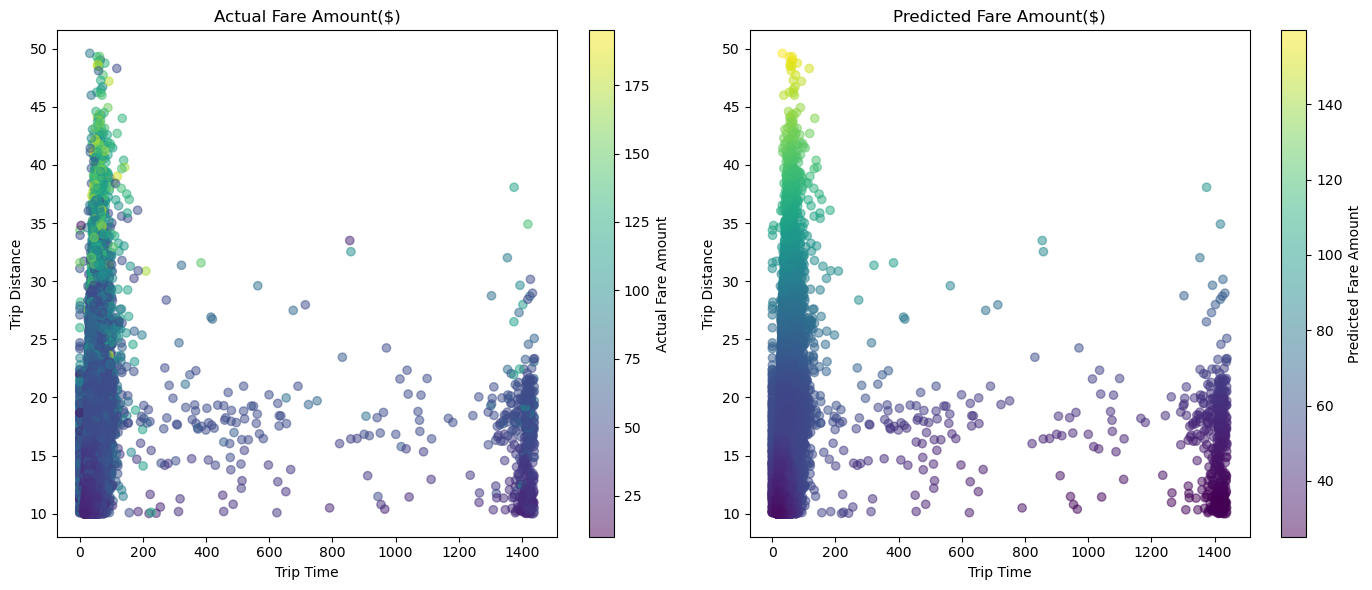

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

# Actual fare amounts
plt.subplot(1, 2, 1)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['fare_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Actual Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Actual Fare Amount($)')

# Predicted fare amounts
plt.subplot(1, 2, 2)
plt.scatter(test_data['trip_time'], test_data['trip_distance'], c=test_data['predicted_amount'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Predicted Fare Amount')
plt.xlabel('Trip Time')
plt.ylabel('Trip Distance')
plt.title('Predicted Fare Amount($)')

plt.tight_layout()
plt.show()

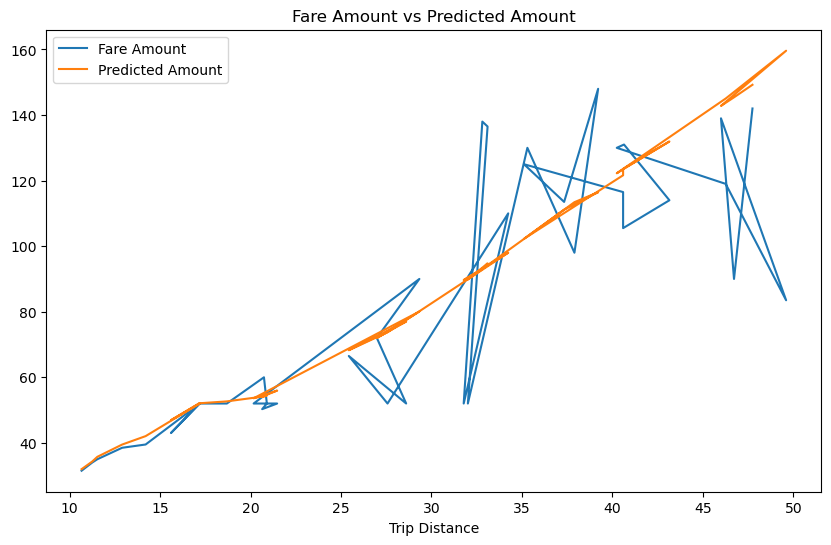

In [35]:
import numpy as np

def sample_plot(data, column, num=50):
  #  Define number of bins
  num_bins = 10
  bins = np.linspace(0, num, num_bins + 1)
  sampled_data_list = []

  # Sample evenly from each bin
  for i in range(num_bins):
      bin_data = data[(data[column] >= bins[i]) & (data[column] < bins[i+1])]
      if not bin_data.empty:
          sampled_data_list.append(bin_data.sample(min(len(bin_data), 5), random_state=42))

  sampled_data = pd.concat(sampled_data_list)

  return sampled_data

sample = sample_plot(test_data, 'trip_distance')
plt.figure(figsize=(10, 6))

plt.plot(sample['trip_distance'], sample['fare_amount'], label='Fare Amount')
plt.plot(sample['trip_distance'], sample['predicted_amount'], label='Predicted Amount')
plt.title('Fare Amount vs Predicted Amount')
plt.xlabel('Trip Distance')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')